In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("IceCreamData.csv")
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
label=LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i]=label.fit_transform(df[i])

df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [5]:
x=df.drop("Revenue",axis=1)
y=df["Revenue"]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Temperature
249,18.148952
433,8.756004
19,21.775948
322,18.439982
332,15.843022
...,...
106,23.761436
270,24.628611
348,38.185199
435,15.916678


In [7]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [8]:
y_pred=model.predict(x_test)
y_pred

array([702.9940111, 649.729072 , 603.2329422, 521.7754452, 612.2437215,
       278.4182651, 293.9263927, 303.7343815, 528.1162401, 696.6401775,
       733.215828 , 414.423028 , 413.9140669, 679.3177906,  10.       ,
       216.183462 , 550.2785159, 569.6187562, 563.2509867, 702.9940111,
       523.1245467, 756.9625616, 726.2337713, 526.5470649, 926.0671533,
       662.5589903, 303.7343815, 642.3498137, 773.9247547, 690.7892959,
       473.5681122, 496.0112948, 702.6236136, 809.6720534, 651.5043041,
       499.4583433, 793.079011 , 339.1095829, 276.3733742, 118.8121496,
       550.7014036, 241.2785475, 553.1196514, 395.2737497, 473.5681122,
       579.3073878, 531.7424848, 118.8121496, 541.2936627, 546.6938576,
       581.0740052, 520.4703098, 451.4507843, 521.7754452, 570.9909316,
       642.3498137, 603.3053386, 629.8937918, 170.2377561, 631.3182368,
       550.7014036, 696.7166402, 516.5486011, 642.3498137, 618.2357655,
       441.5087331, 545.9039291, 499.4583433, 773.9247547, 274.0

In [9]:
msc=mean_squared_error(y_test,y_pred)
print(f"mean_squared_error:{msc}")

rmsc=np.sqrt(msc)
print(f"sqrt:{rmsc}")

mean_squared_error:1328.7245076491977
sqrt:36.451673591883235


In [10]:
score=r2_score(y_test,y_pred)
score

0.9534772958686918

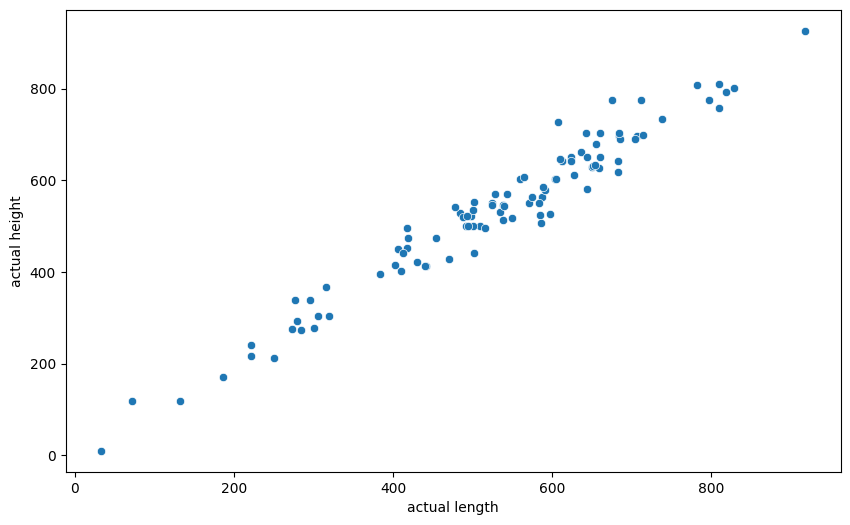

In [11]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("actual length")
plt.ylabel("actual height")
plt.show()

In [12]:
data=pd.DataFrame({
    "Temperature":[24.566884]
})
pre=model.predict(data)
pre

array([531.7424848])